In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

In [3]:
## load the ANI similarity matrix
ani_sim_df = pd.read_csv('ani_matrix_for_all_genomes.csv', sep=',', header=0)
labels = ['_'.join(x.split('/')[-1].split('_')[:2]) for x in ani_sim_df.columns]
sim_mat = ani_sim_df.to_numpy()
dist_mat = 1 - sim_mat
assert dist_mat.shape[0] == dist_mat.shape[1]

In [4]:
id_to_category_df = pd.read_csv('/scratch/shared_data_new/metagenomics_graph/model_training/for_shaopeng_data/10p_holdout/all.txt', sep='\t', header=0)
id_to_category = {row[0]:row[1] for row in id_to_category_df.to_numpy()}
# color_map = {'negative': 'blue', 'positive': 'red'}
label_group = [id_to_category[x] for x in labels]

In [30]:
data_path = '/scratch/shared_data_new/metagenomics_graph/model_training/data/'
id_to_datatype = {}
train_set = pd.read_csv(f'{data_path}/train_set.tsv', sep='\t', header=0)
id_to_datatype.update({x:'train' for x in train_set['GTDB_id']})
valid_set = pd.read_csv(f'{data_path}/valid_set.tsv', sep='\t', header=0)
id_to_datatype.update({x:'valid' for x in valid_set['GTDB_id']})
test_set = pd.read_csv(f'{data_path}/test_set.tsv', sep='\t', header=0)
id_to_datatype.update({x:'test' for x in test_set['GTDB_id']})
type_group = [id_to_datatype[x] for x in labels]

/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed 

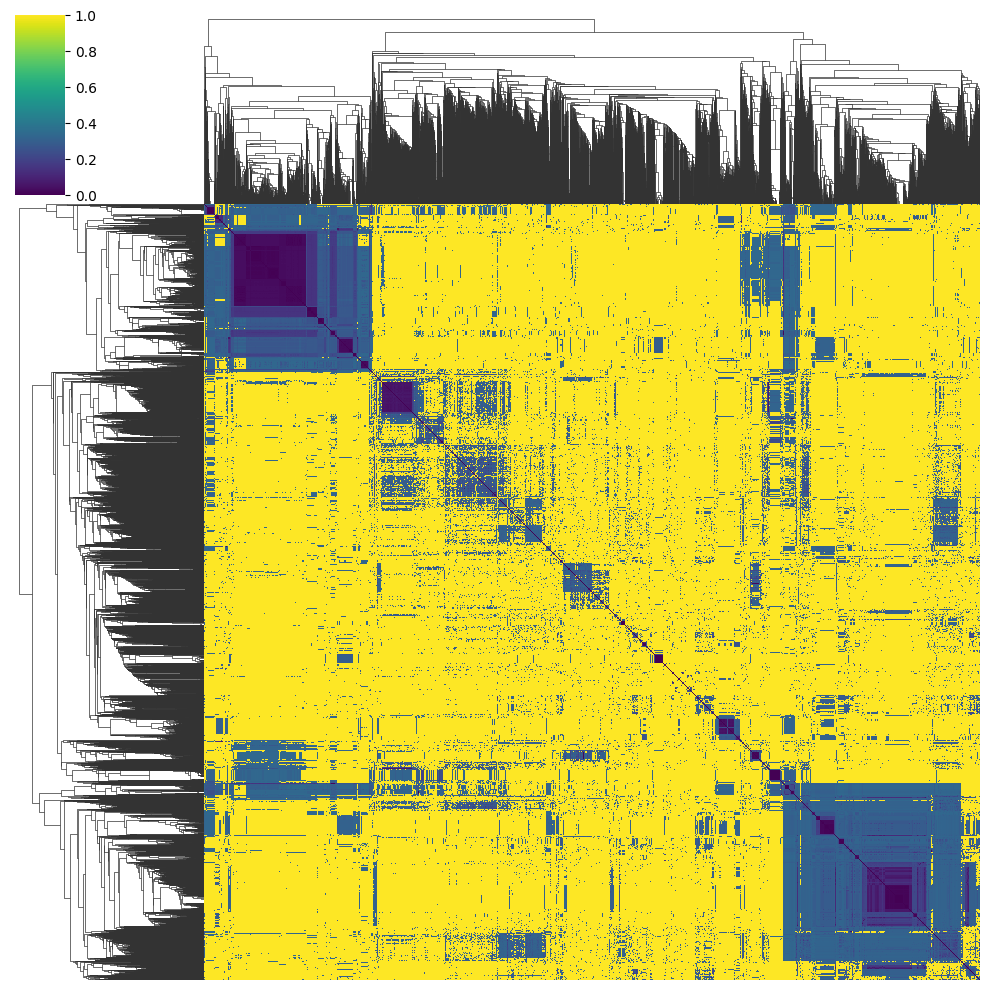

In [5]:
# Create a pandas DataFrame with the distance matrix and labels
df = pd.DataFrame(dist_mat, columns=label_group, index=label_group)

# Create the seaborn clustermap
g = sns.clustermap(df, method='average', cmap='viridis', row_cluster=True, col_cluster=True, 
                   xticklabels=False, yticklabels=False);
linkage = g.dendrogram_row.linkage
# determine cluster number
num_clusters = 40
clusters = fcluster(linkage, num_clusters, criterion='maxclust')


In [32]:
type_group

['train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'test',
 'valid',
 'train',
 'test',
 'test',
 'test',
 'train',
 'valid',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'valid',
 'train',
 'train',
 'test',
 'train',
 'test',
 'valid',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'test',
 'train',
 'train',
 'train',
 'train',
 'train',
 'test',
 'train',
 'train',
 'train',
 'test',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'test',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'valid',
 'test',
 'test',
 'valid',
 'test',
 'train',
 'train',
 'train',
 'train',
 'train',
 'test',
 'valid',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'test',
 'valid',
 'tra

/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/grads/cqm5886/miniconda3/envs/mkg_model_training/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed 

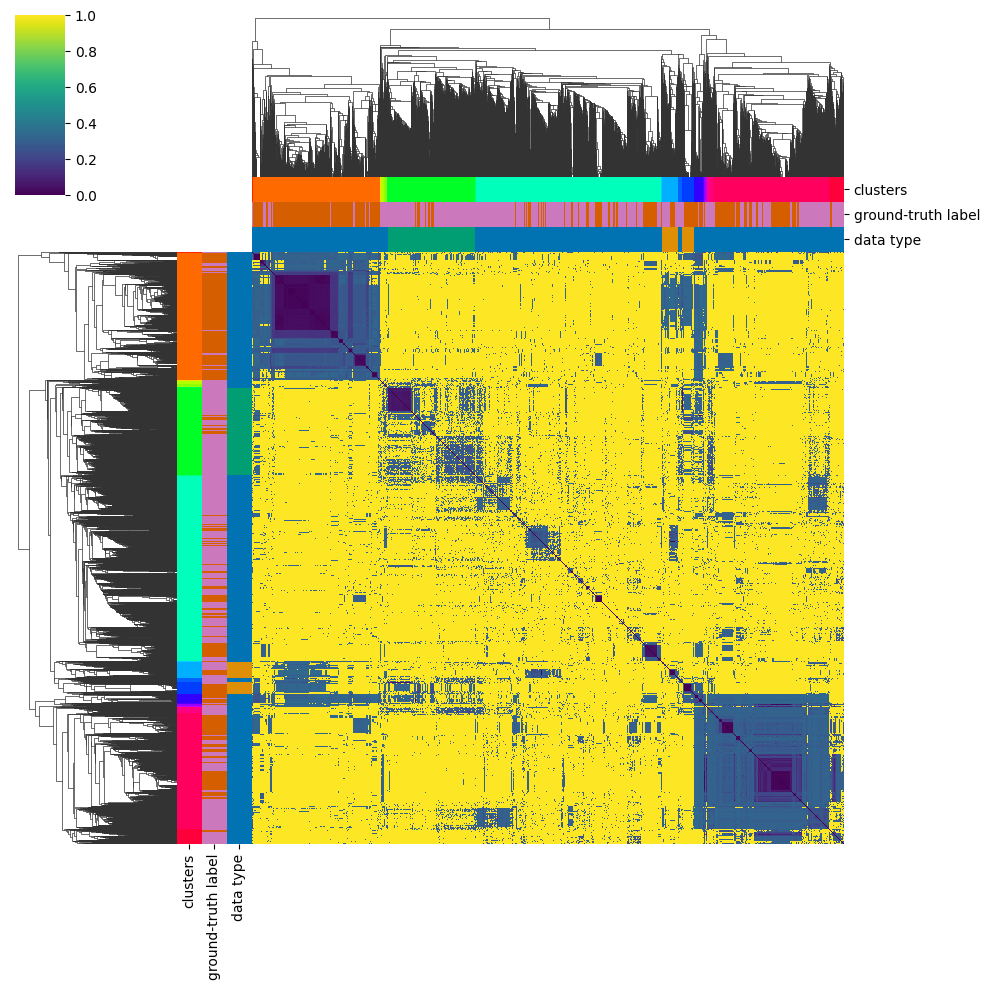

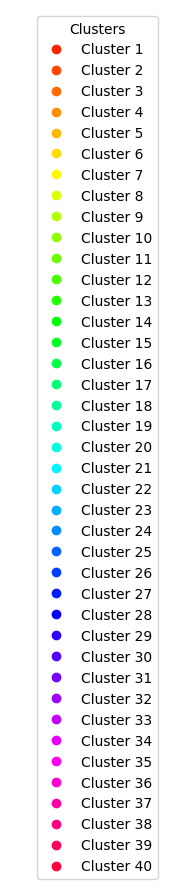

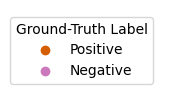

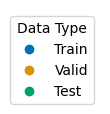

In [36]:
# Create a color palette with different colors for the clusters
cluster_colors = sns.color_palette("hsv", num_clusters)

# Map the clusters to colors
row_colors = pd.Series(clusters, index=df.index).map(dict(zip(range(1, num_clusters+1), cluster_colors)))

# Use Seaborn's colorblind palette for 'train', 'valid', 'test'
# Selecting the first three colors from the colorblind palette
colorblind_palette = sns.color_palette("colorblind")
datatype_colors = {
    'train': colorblind_palette[0],  # First color for train
    'valid': colorblind_palette[1],  # Second color for valid
    'test': colorblind_palette[2],   # Third color for test
}

# Create a list for row colors for data type ('positive' or 'negative')
label_colors = [colorblind_palette[3] if l == 'positive' else colorblind_palette[4] for l in label_group]

# Map each ID to its dataset type ('train', 'valid', 'test') and then to the corresponding color
type_colors = [datatype_colors[l] for l in type_group]

# Combine the two color lists into one, with cluster colors first, then type colors
combined_row_colors = pd.DataFrame({'clusters': row_colors, 'ground-truth label': label_colors, 'data type': type_colors})

# Do the same for the columns
combined_col_colors = combined_row_colors

# Create the seaborn clustermap
g = sns.clustermap(df, method='average', cmap='viridis', row_cluster=True, col_cluster=True, 
                   row_colors=combined_row_colors,
                   col_colors=combined_col_colors,
                   xticklabels=False, yticklabels=False)

plt.show()

# Now create separate figures for legends

# Cluster Legend
cluster_legend_handles = [plt.Line2D([0], [0], color=c, marker='o', linestyle='') for c in cluster_colors]
plt.figure(figsize=(2, 5))
plt.legend(cluster_legend_handles, ['Cluster {}'.format(i) for i in range(1, num_clusters+1)], title='Clusters', bbox_to_anchor=(1, 1))
plt.axis('off')
plt.show()

# Ground-Truth Label Legend
label_legend_handles = [
    plt.Line2D([0], [0], color=colorblind_palette[3], marker='o', linestyle='', label='Positive'),
    plt.Line2D([0], [0], color=colorblind_palette[4], marker='o', linestyle='', label='Negative')
]
plt.figure(figsize=(1, 1))
plt.legend(handles=label_legend_handles, title='Ground-Truth Label')
plt.axis('off')
plt.show()

# Data Type Legend
datatype_legend_handles = [
    plt.Line2D([0], [0], color=colorblind_palette[0], marker='o', linestyle='', label='Train'),
    plt.Line2D([0], [0], color=colorblind_palette[1], marker='o', linestyle='', label='Valid'),
    plt.Line2D([0], [0], color=colorblind_palette[2], marker='o', linestyle='', label='Test')
]
plt.figure(figsize=(1, 1))
plt.legend(handles=datatype_legend_handles, title='Data Type')
plt.axis('off')
plt.show()




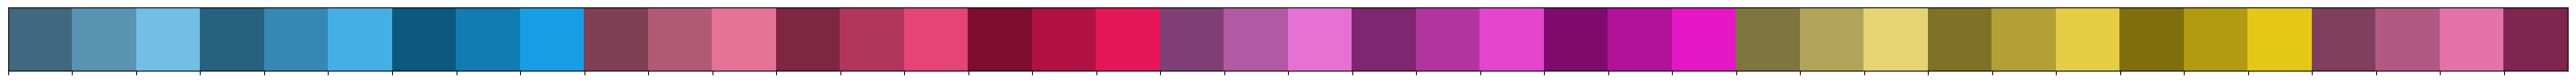

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

def create_colorblind_friendly_palette(n_colors):
    # Define ranges of hues to avoid: reds to greens approximately between 0 to 1/3 in normalized hue
    avoid_hue_ranges = [(0, 0.1), (0.25, 0.45)]  # Normalized hue ranges to avoid (red-green areas)
    usable_hues = []

    # Generate hues outside the avoided ranges
    while len(usable_hues) < n_colors:
        hue = np.random.rand()  # Generate a random hue
        if not any(lower <= hue <= upper for lower, upper in avoid_hue_ranges):
            usable_hues.append(hue)

    # Create colors with varying saturation and brightness for each hue
    colors = []
    for hue in usable_hues:
        for sat in [0.5, 0.7, 0.9]:  # Vary saturation
            for val in [0.5, 0.7, 0.9]:  # Vary brightness/value
                if len(colors) < n_colors:
                    colors.append((hue, sat, val))
                else:
                    break

    # Convert HSV colors to RGB
    rgb_colors = [mcolors.hsv_to_rgb(color) for color in colors]

    return rgb_colors

# Generate a colorblind-friendly palette with 40 distinct colors
n_colors = 40
colorblind_friendly_palette = create_colorblind_friendly_palette(n_colors)

# Display the palette
sns.palplot(colorblind_friendly_palette)
plt.show()

In [91]:
combined_table = pd.concat([pd.DataFrame(labels, columns=['GTDB_id']), pd.DataFrame(label_group, columns=['label']), pd.DataFrame(clusters, columns=['cluster'])], axis=1)

In [118]:
## read all info of pathogen and non-pathogen
pathogen_info = pd.read_csv('/scratch/shared_data_new/metagenomics_graph/model_training/data/pathogen_info.tsv', sep='\t', header=0)
non_pathogen_info = pd.read_csv('/scratch/shared_data_new/metagenomics_graph/model_training/data/non_pathogen_info.tsv', sep='\t', header=0)
all_info = pd.concat([pathogen_info, non_pathogen_info], axis=0)

In [129]:
temp_table = []
for row in all_info.to_numpy():
    synonyms = eval(row[4])
    gtdb_synonym = [synonym for synonym in synonyms if 'GTDB:' in synonym]
    if len(gtdb_synonym) != 1:
        continue
    temp_table += [[gtdb_synonym[0].split('GTDB:')[1]] + list(row)]
temp_table = pd.DataFrame(temp_table, columns=['GTDB_id'] + list(all_info.columns))

In [133]:
combined_table = combined_table.merge(temp_table, on='GTDB_id', how='left').reset_index(drop=True)

In [144]:
combined_table.to_csv('6k_genomes_with_cluster_info.csv', sep='\t', index=False)

In [196]:
combined_table.loc[combined_table['cluster'] == 15,'label'].value_counts()

label
negative    817
positive    111
Name: count, dtype: int64

In [197]:
combined_table.loc[combined_table['cluster'] == 29,'label'].value_counts()

label
positive    84
negative    11
Name: count, dtype: int64

In [198]:
combined_table.loc[combined_table['cluster'] == 23,'label'].value_counts()

label
negative    113
positive     58
Name: count, dtype: int64

In [199]:
combined_table.loc[combined_table['cluster'] == 26,'label'].value_counts()

label
positive    94
negative    27
Name: count, dtype: int64

In [200]:
combined_table['label'].value_counts()

label
negative    3575
positive    2677
Name: count, dtype: int64

In [207]:
output_dir = '/scratch/shared_data_new/metagenomics_graph/model_training/for_shaopeng_data/ANI_maskout_test1'

In [243]:
## generate test set
group15_parents = list(set(combined_table.query('cluster == 15')['parent_list'].to_list()))
test_df = combined_table.loc[(combined_table['cluster'] == 15) & (combined_table['parent_list'].isin(group15_parents)),:].reset_index(drop=True)
test_df.to_csv(f'{output_dir}/test_set.tsv', sep='\t', index=None)
combined_table.loc[(combined_table['cluster'] == 15) & (combined_table['parent_list'].isin(group15_parents)),'label'].value_counts()

label
negative    817
positive    111
Name: count, dtype: int64

In [252]:
test_df['cluster'].unique()

array([15], dtype=int32)

In [244]:
## generate valid set
group23_parents = list(set(combined_table.query('cluster == 23')['parent_list'].to_list()))
group26_parents = list(set(combined_table.query('cluster == 26')['parent_list'].to_list()))
# combined_table.loc[combined_table['parent_list'].isin(group23_parents),'cluster'].value_counts()
temp_df1 = combined_table.loc[(combined_table['cluster'] == 23) & (combined_table['parent_list'].isin(group23_parents)),:]
temp_df2 = combined_table.loc[(combined_table['cluster'] == 26) & (combined_table['parent_list'].isin(group26_parents)),:]
valid_df = pd.concat([temp_df1, temp_df2], axis=0).reset_index(drop=True)
valid_df.to_csv(f'{output_dir}/valid_set.tsv', sep='\t', index=None)
valid_df.loc[:,'label'].value_counts()

label
positive    152
negative    140
Name: count, dtype: int64

In [251]:
valid_df['cluster'].unique()

array([23, 26], dtype=int32)

In [248]:
## generate train set
valid_test_ids = list(set(valid_df['GTDB_id'].to_list() + test_df['GTDB_id'].to_list()))
train_df = combined_table.loc[~combined_table['GTDB_id'].isin(valid_test_ids),:].reset_index(drop=True)
train_df.to_csv(f'{output_dir}/train_set.tsv', sep='\t', index=None)
train_df.loc[:,'label'].value_counts()

label
negative    2618
positive    2414
Name: count, dtype: int64

In [250]:
train_df['cluster'].unique()

array([ 3, 19, 25, 39, 29, 40,  9, 38, 30, 32, 10, 13, 18, 33, 12, 20, 22,
       36, 21, 17,  2,  4, 31,  1, 14, 11, 28,  8, 34,  7, 16, 35, 37,  6,
        5, 27, 24], dtype=int32)

In [140]:
group15_parents = list(set(combined_table.query('cluster == 15')['parent_list'].to_list()))

In [150]:
group29_parents = list(set(combined_table.query('cluster == 29')['parent_list'].to_list()))

In [185]:
group23_parents = list(set(combined_table.query('cluster == 23')['parent_list'].to_list()))

In [187]:
group26_parents = list(set(combined_table.query('cluster == 26')['parent_list'].to_list()))

In [194]:
combined_table.loc[(combined_table['parent_list'].isin(group26_parents)),'cluster'].value_counts()

cluster
26    121
29      2
Name: count, dtype: int64

In [168]:
group29_15_shared_parents = list(set(combined_table.loc[(combined_table['parent_list'].isin(group15_parents)) & (combined_table['cluster'] == 29), 'parent_list'].to_list()))

In [172]:
combined_table.loc[(combined_table['parent_list'].isin(group29_15_shared_parents)) & (combined_table['cluster'] == 15),:]

9